In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'stress_testing_with_cols_outliers'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'COMPAS'
EXPERIMENT_SESSION_UUID = '72079650-0f90-41e5-908e-ef4c9d9826b8'
SENSITIVE_ATTRS = ['sex', 'race', 'sex&race']
PREPROCESSING_TECHNIQUES = ['No']

In [6]:
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
               'XGBClassifier', 'KNeighborsClassifier']

In [7]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [8]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(320, 25)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,0,OK,2023-05-02 13:51:18.915,...,100,100,"[1, 2, 3]",0.715909,0.718266,0.712195,0.717472,0.723404,0.714286,0.722772
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,1,OK,2023-05-02 13:51:18.927,...,100,100,"[1, 2, 3]",0.714015,0.727554,0.692683,0.724907,0.702128,0.711944,0.722772
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,2,OK,2023-05-02 13:51:18.938,...,100,100,"[1, 2, 3]",0.704545,0.705882,0.702439,0.702602,0.702128,0.702576,0.712871
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,3,OK,2023-05-02 13:51:18.948,...,100,100,"[1, 2, 3]",0.704545,0.712074,0.692683,0.710037,0.723404,0.700234,0.722772
20,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,0,OK,2023-05-02 13:53:55.975,...,200,200,"[1, 2, 3]",0.670455,0.675841,0.661692,0.684015,0.687500,0.672986,0.660377
21,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,1,OK,2023-05-02 13:53:55.985,...,200,200,"[1, 2, 3]",0.651515,0.657492,0.641791,0.665428,0.625000,0.658768,0.622642
22,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,2,OK,2023-05-02 13:53:55.996,...,200,200,"[1, 2, 3]",0.657197,0.660550,0.651741,0.669145,0.625000,0.665877,0.622642
23,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,3,OK,2023-05-02 13:53:56.006,...,200,200,"[1, 2, 3]",0.651515,0.642202,0.666667,0.661710,0.750000,0.654028,0.641509
40,Accuracy,301,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,0,OK,2023-05-02 13:54:21.896,...,300,300,"[1, 2, 3]",0.662879,0.657051,0.671296,0.643137,0.735849,0.645933,0.727273
41,Accuracy,301,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,1,OK,2023-05-02 13:54:21.907,...,300,300,"[1, 2, 3]",0.634470,0.637821,0.629630,0.639216,0.679245,0.629187,0.654545


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [12]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

## Metrics Visualization and Reporting

In [13]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

### Subgroup metrics per dataset, experiment iteration, and model

In [14]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance',
                                                mode='max_num_columns')

alt.VConcatChart(...)

In [15]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error',
                                                mode='max_num_columns')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [16]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance',
                                             mode='max_num_columns')

alt.VConcatChart(...)

In [17]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness',
                                             mode='max_num_columns')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [18]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

In [19]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Label_Stability',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

In [20]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

In [21]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Accuracy',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [22]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric=visualizer.all_group_variance_metrics_lst[1],
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES,
                                                       mode='max_num_columns')

alt.VConcatChart(...)

In [15]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric=visualizer.all_group_fairness_metrics_lst[3],
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES,
                                                       mode='max_num_columns')

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [24]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter',
                                                                            model_name=MODEL_NAMES[0],
                                                                            mode='max_num_columns')

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

In [29]:
# visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1,
#                                                                    target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
#                                                                    subgroup_metrics_type='variance')

In [30]:
# visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1,
#                                                                    target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
#                                                                    subgroup_metrics_type='error')

### Box plots for subgroup metrics per model and error level

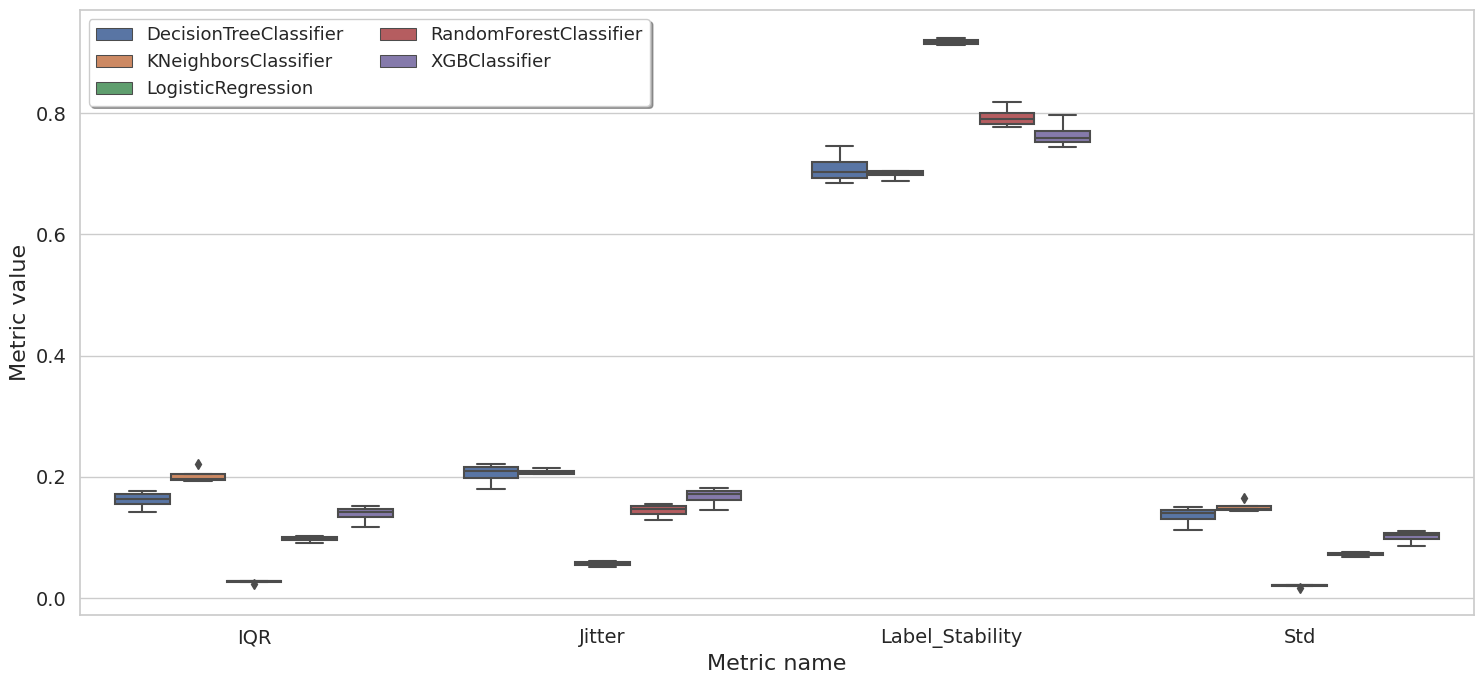

In [27]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

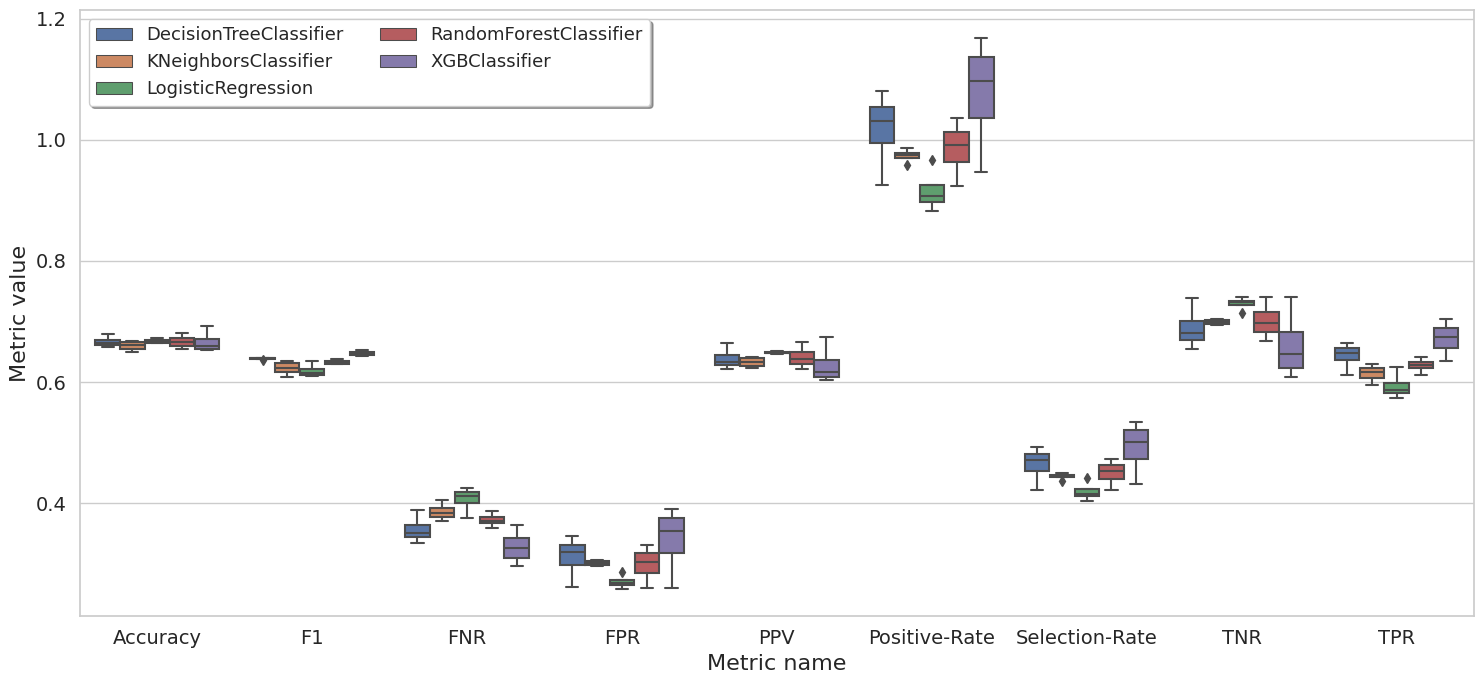

In [28]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')

### Box plots for group metrics per model and error level

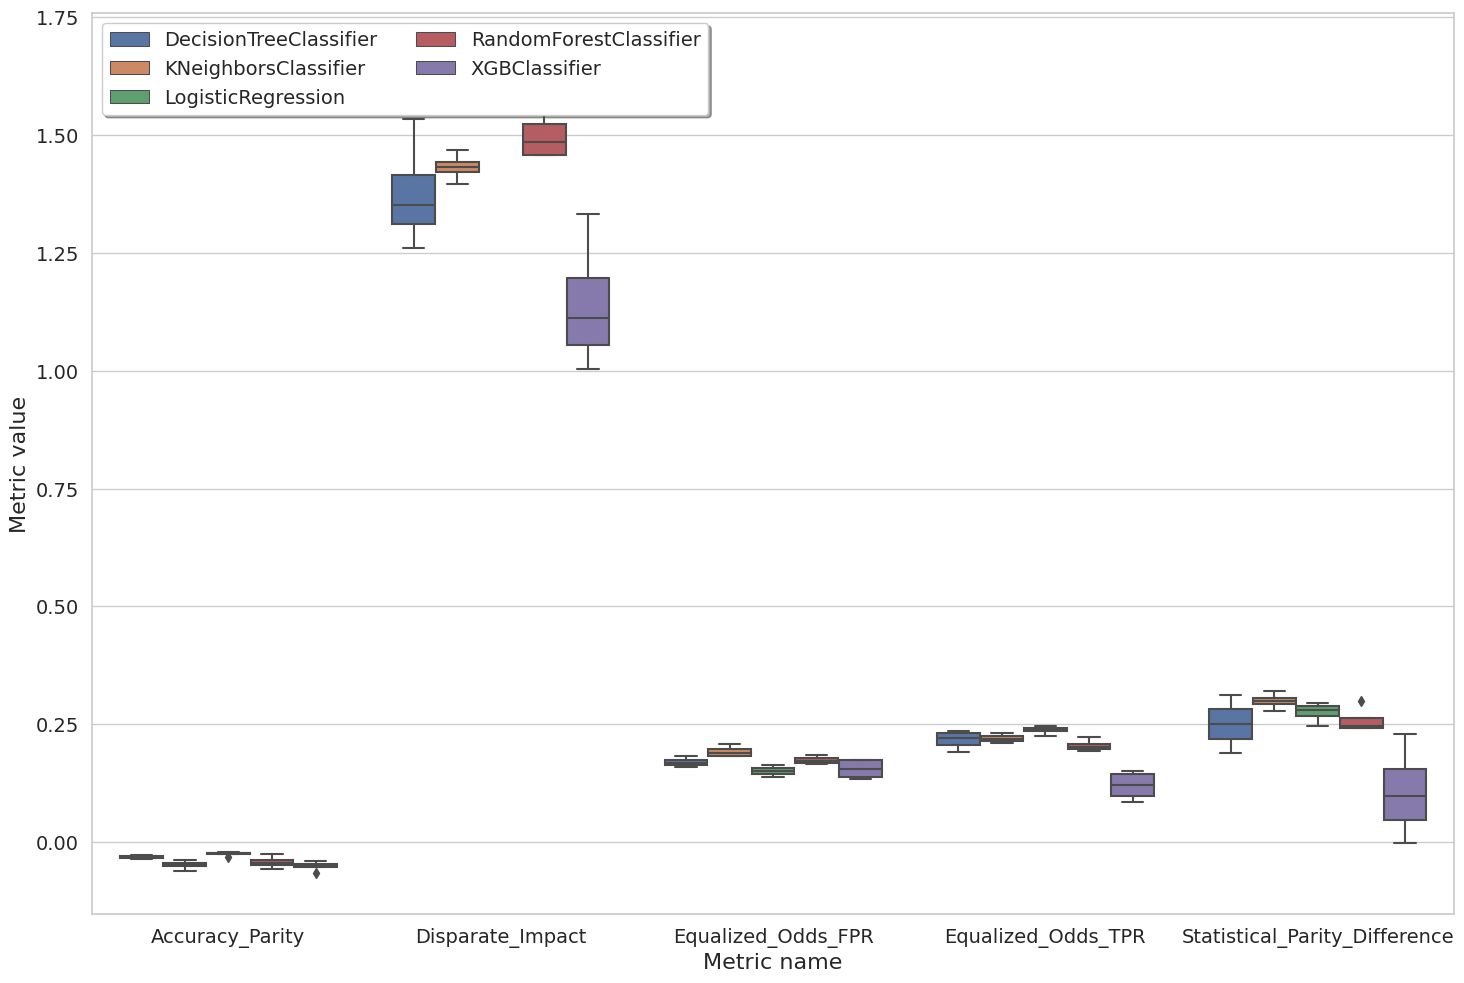

In [29]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='sex',
                                                                  group_metrics_type='fairness')

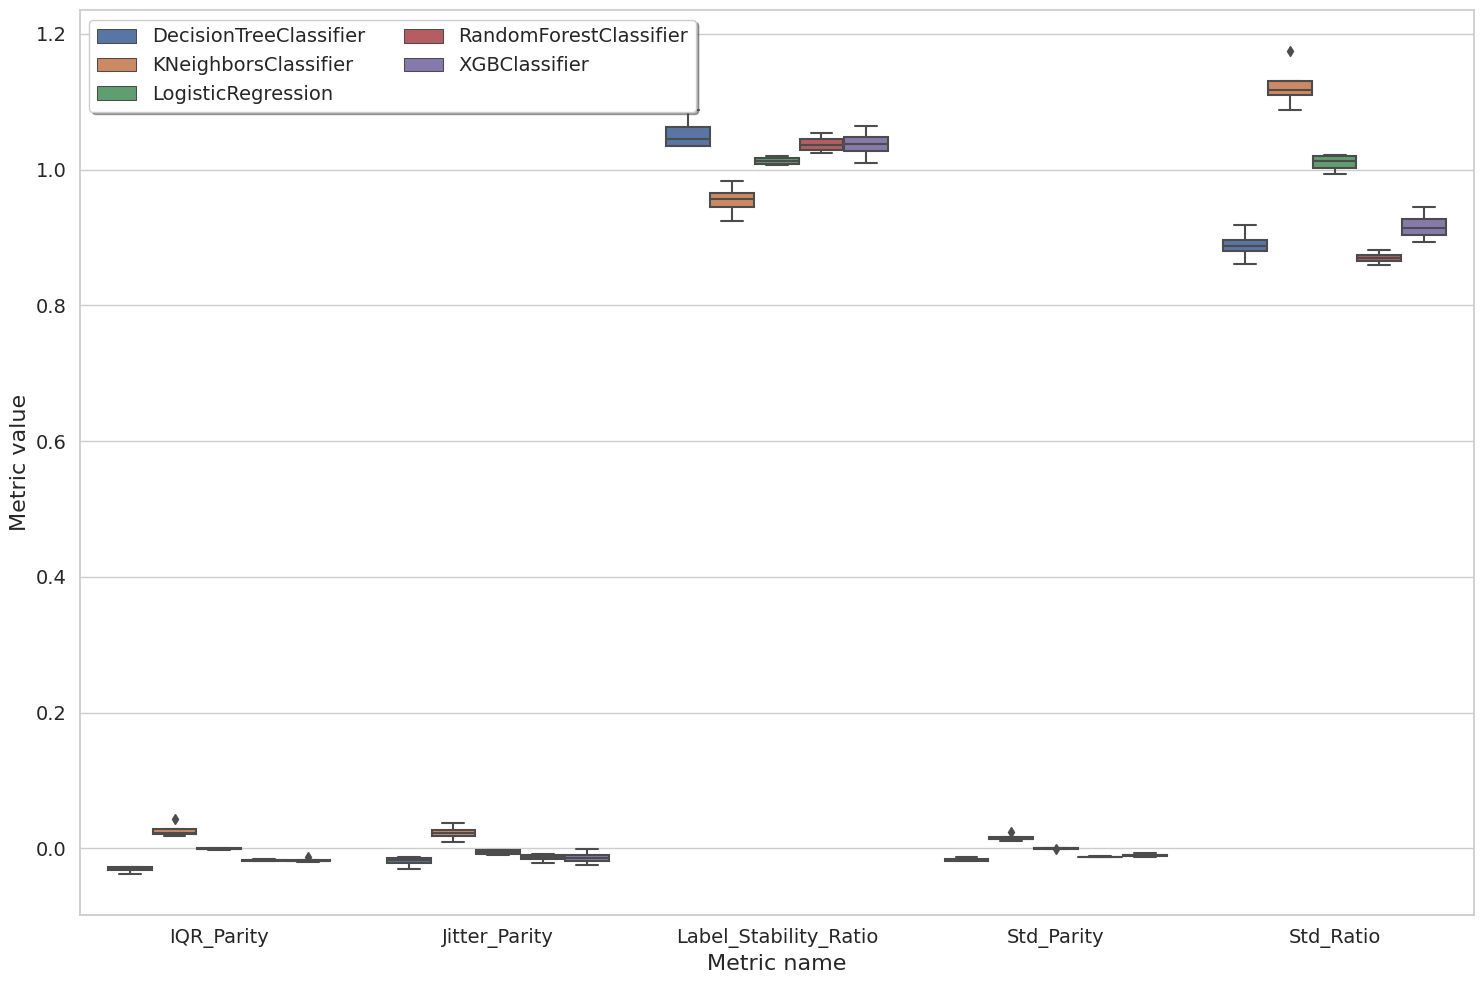

In [30]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='sex',
                                                                  group_metrics_type='variance')

### One box plot for both error and variance metrics for subgroups

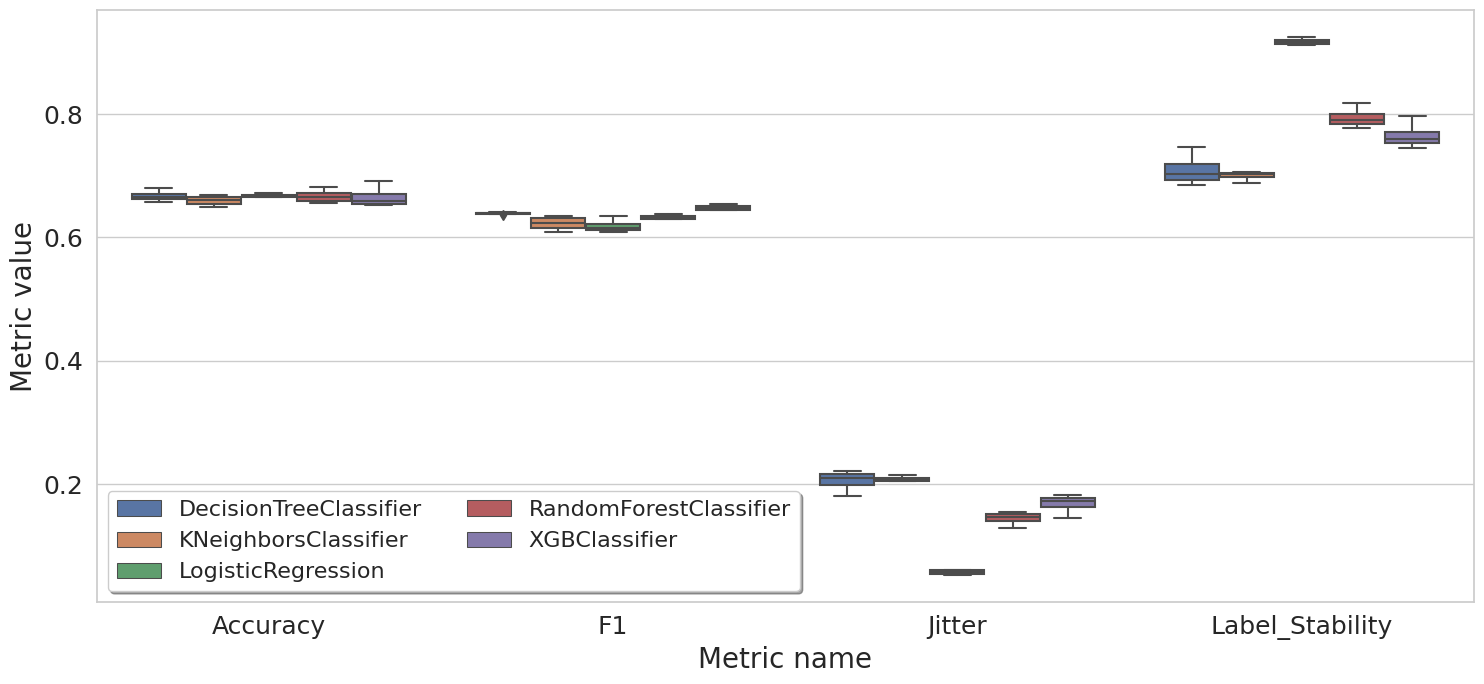

In [16]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics=['F1', 'Accuracy', 'Jitter', 'Label_Stability'],
                                                                     legend_loc='lower left')

In [15]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name='XGBClassifier',
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics=['Accuracy', 'F1', 'Jitter', 'Label_Stability'],
                                                mode='max_num_columns')

alt.VConcatChart(...)

In [14]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name='LogisticRegression',
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics=['Accuracy', 'F1', 'Jitter', 'Label_Stability'],
                                                mode='max_num_columns')

alt.VConcatChart(...)

In [16]:
# Model names: DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, XGBClassifier, KNeighborsClassifier
visualizer.create_subgroups_grid_pct_lines_plot(model_name='KNeighborsClassifier',
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics=['Accuracy', 'F1', 'Jitter', 'Label_Stability'],
                                                mode='max_num_columns')

alt.VConcatChart(...)

In [16]:
# Model names: DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, XGBClassifier, KNeighborsClassifier
visualizer.create_grid_for_metrics_comparison(model_name='KNeighborsClassifier',
                                              target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                              subgroup_metrics=['Jitter', 'Accuracy'],
                                              group_metrics=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                              mode='max_num_columns')

alt.VConcatChart(...)